# Fundamentals of TSA

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%matplotlib inline

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# 1. We can generate the dataset using the numpy library:
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=50)
zero_mean_series

array([ 0.16537076,  0.26622352,  0.78839455,  0.27672059,  0.17918145,
       -0.11486052, -0.69426688, -0.1873411 , -0.2419676 , -1.34074146,
       -0.90629687,  0.23224217, -0.71932761,  0.05500862,  0.45826763,
        1.13731957, -0.01119376,  0.32491569, -0.71169473,  0.11480821,
        0.45879317,  0.09250564,  1.14129952, -0.46859079, -0.11062623,
        0.90360255,  0.51925107, -1.24433448,  0.2975624 , -1.41801948,
       -0.17452673,  1.60894216, -0.36905067,  0.01535335,  1.01738984,
       -0.72478636,  0.71342391, -0.3326904 , -0.72266417,  0.74568237,
       -0.33509383,  0.35148147, -0.92614864,  0.96530698, -0.87447911,
        0.21566624,  0.54743654, -0.49875766,  0.06776176, -0.7118763 ])

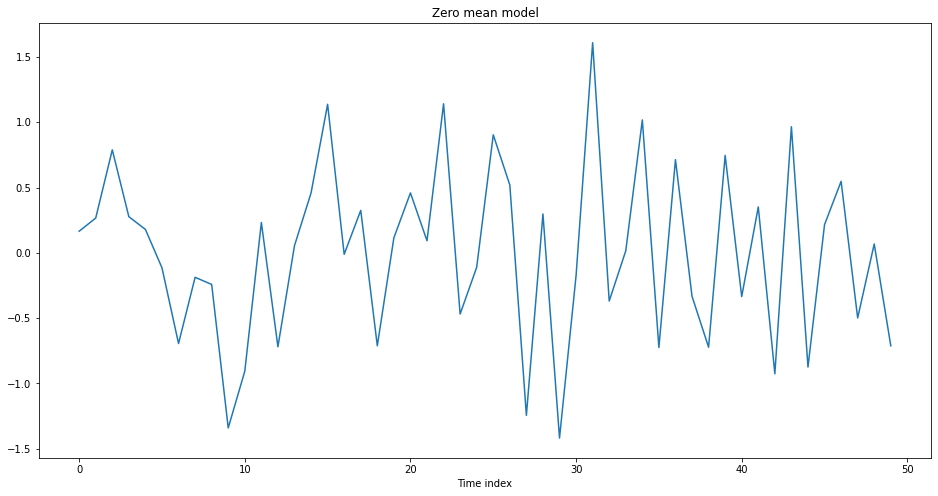

In [5]:
# 2. We are going to use the seaborn library to plot the time series data.
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=zero_mean_series)
g.set_title('Zero mean model')
g.set_xlabel('Time index')
plt.show()

In [6]:
# 3. we can perform a cumulative sum over the list and then plot the data using a time series plot.
random_walk = np.cumsum(zero_mean_series)
random_walk

array([ 0.16537076,  0.43159428,  1.21998882,  1.49670942,  1.67589086,
        1.56103034,  0.86676346,  0.67942236,  0.43745476, -0.90328671,
       -1.80958358, -1.57734141, -2.29666902, -2.2416604 , -1.78339277,
       -0.6460732 , -0.65726696, -0.33235126, -1.04404599, -0.92923778,
       -0.47044461, -0.37793897,  0.76336055,  0.29476976,  0.18414353,
        1.08774607,  1.60699714,  0.36266266,  0.66022507, -0.75779441,
       -0.93232114,  0.67662101,  0.30757035,  0.3229237 ,  1.34031354,
        0.61552717,  1.32895108,  0.99626068,  0.27359651,  1.01927888,
        0.68418505,  1.03566652,  0.10951788,  1.07482486,  0.20034574,
        0.41601198,  0.96344852,  0.46469086,  0.53245262, -0.17942368])

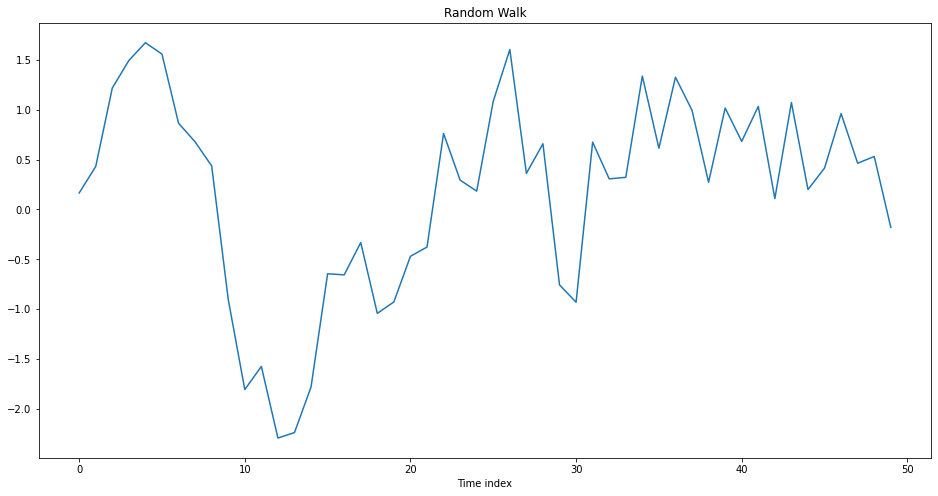

In [8]:
# 4. now, if we plot the list using the time series plot as shown here, we get an interesting graph that shows the change in values over time:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index')
plt.show()

# TSA with Open Power System Data

In [9]:
# load time series dataset
# df_power = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
# df_power = pd.read_csv('./02. DataSet/opsd_germany_daily.csv', encoding='utf8')
df_power = pd.read_csv('/content/gdrive/My Drive/01.google-colab/61.AIStudy/data/opsd_germany_daily.csv')
# df_power
df_power.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

# Data Cleaning

In [10]:
# 1. we can start by checking the shape of the dataset
print("df_power.shape = ", df_power.shape)

# w2. e can also check few entries inside the dataframe.
print("df_power.tail(5) = ") 
print(df_power.tail(5))

df_power.shape =  (4383, 5)
df_power.tail(5) = 
            Date  Consumption     Wind   Solar  Wind+Solar
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156


In [11]:
# 3. let's review the data types of each column in our df_power dataframe:
print("df_power.dtypes = ")
print(df_power.dtypes)

df_power.dtypes = 
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


In [13]:
# 4.
# convert object to datetime format
df_power['Date'] = pd.to_datetime(df_power['Date'])

# 5. it should convert the Date column to Datetime format
print("df_power.dtypes = ")
print(df_power.dtypes)

df_power.dtypes = 
Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object


In [14]:
# 6. let's next change the index of our dataframe to the Date column
df_power = df_power.set_index('Date')
print("df_power.tail(3) = ")
print(df_power.tail(3))

df_power.tail(3) = 
            Consumption     Wind   Solar  Wind+Solar
Date                                                
2017-12-29   1295.08753  584.277  29.854     614.131
2017-12-30   1215.44897  721.247   7.467     728.714
2017-12-31   1107.11488  721.176  19.980     741.156


In [16]:
# 7. we can simply verify this by using the code snippet given here:
print("df_power.index = ")
print(df_power.index)

df_power.index = 
DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)


In [25]:
# 8. since our index is the DatetimeIndex object, now we can use it to analyze the dataframe.
# Add columns with year, month, and weekday name
df_power['Year'] = df_power.index.year
df_power['Month'] = df_power.index.month
# df_power['Weekday Name'] = df_power.index.weekday_name
df_power['Weekday Name'] = df_power.index.day_name()

# 9. let's display five random rows from the dataframe:
# display a random sampling of 5 rows
print("df_power.sample = ")
print(df_power.sample(5, random_state=0))

df_power.sample = 
            Consumption    Wind    Solar  Wind+Solar  Year  Month Weekday Name
Date                                                                          
2008-08-23     1152.011     NaN      NaN         NaN  2008      8     Saturday
2013-08-08     1291.984  79.666   93.371     173.037  2013      8     Thursday
2009-08-27     1281.057     NaN      NaN         NaN  2009      8     Thursday
2015-10-02     1391.050  81.229  160.641     241.870  2015     10       Friday
2009-06-02     1201.522     NaN      NaN         NaN  2009      6      Tuesday


# Time-based indexing

In [26]:
# Having time-based indexing allows using a formatted string to select data.
print("df_power.loc['2015-10-02'] = ")
print(df_power.loc['2015-10-02'])

df_power.loc['2015-10-02'] = 
Consumption     1391.05
Wind             81.229
Solar           160.641
Wind+Solar       241.87
Year               2015
Month                10
Weekday Name     Friday
Name: 2015-10-02 00:00:00, dtype: object


# Visualizing time series

df_power['Consumption'].plot(linewidth=0.5) = 
AxesSubplot(0.125,0.125;0.775x0.755)


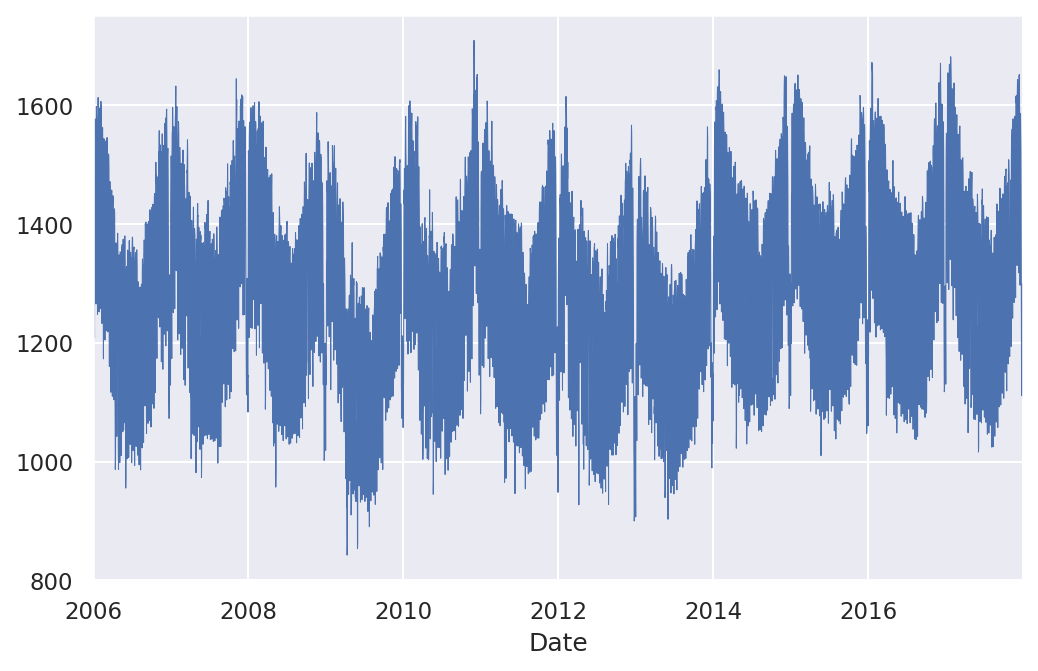

In [37]:
# 1. The first step is to import the seaborn and matplotlib libraries:
sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['figure.dpi'] = 150

# 2. let's generate a line plot of the full time series of Germany's daily electricity consumption:
print("df_power['Consumption'].plot(linewidth=0.5) = ")
print(df_power['Consumption'].plot(linewidth=0.5))

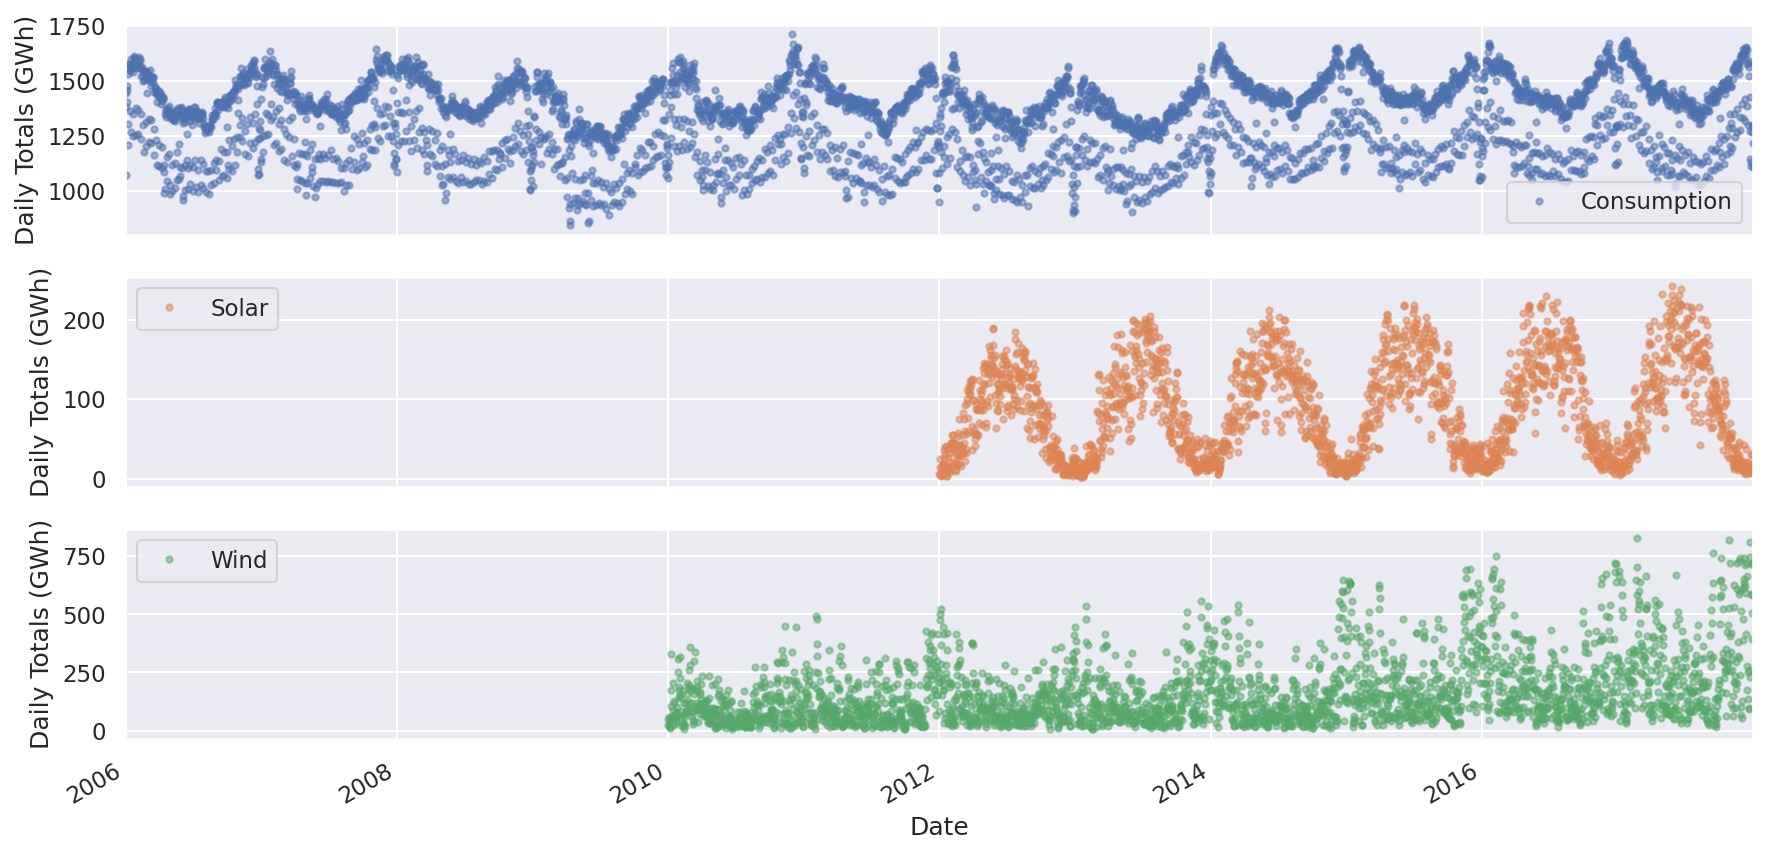

In [40]:
# 3. let's use the dots to plot the data for all the other columns:
cols_to_plot = ['Consumption', 'Solar', 'Wind']
axes = df_power[cols_to_plot].plot(marker='.', alpha=0.5, linestyle = 'None', figsize = (14, 7), subplots=True)
for ax in axes:
  ax.set_ylabel('Daily Totals (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

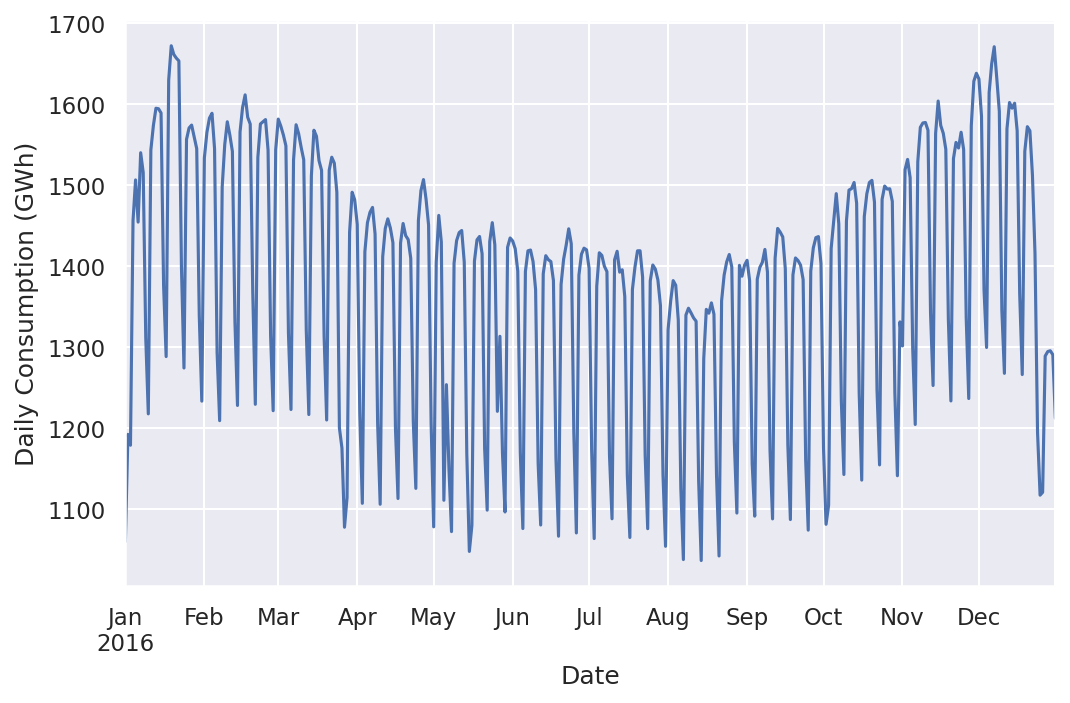

In [44]:
# 4. we can further investigate a single year to have a closer look.
ax = df_power.loc['2016', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

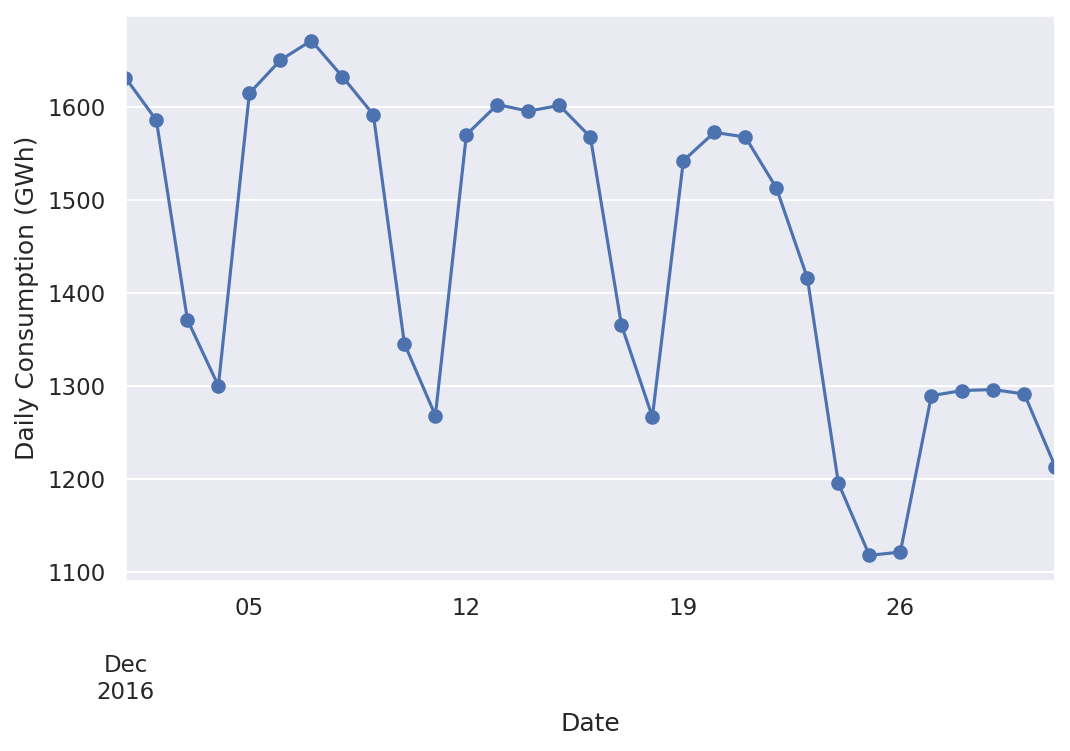

In [50]:
# we can look for details in any particular month
ax = df_power.loc['2016-12', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

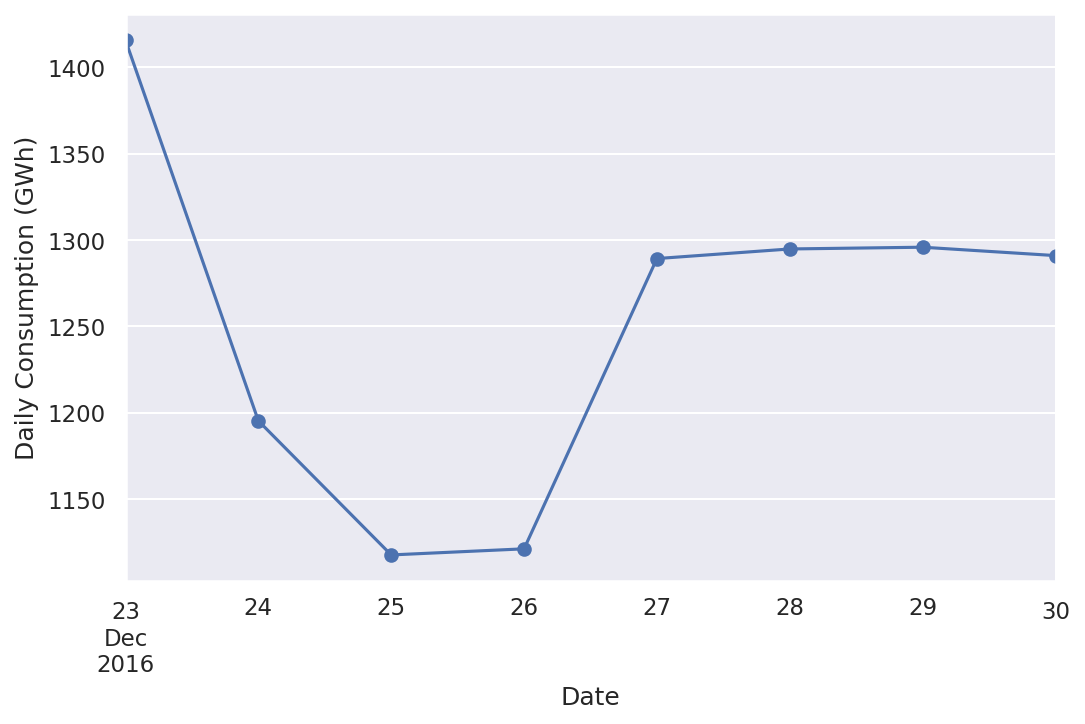

In [51]:
# in order to indicate a particular week of December, we can supply a specific date range as shown here:
ax = df_power.loc['2016-12-23':'2016-12-30', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')

# Grouping time series data

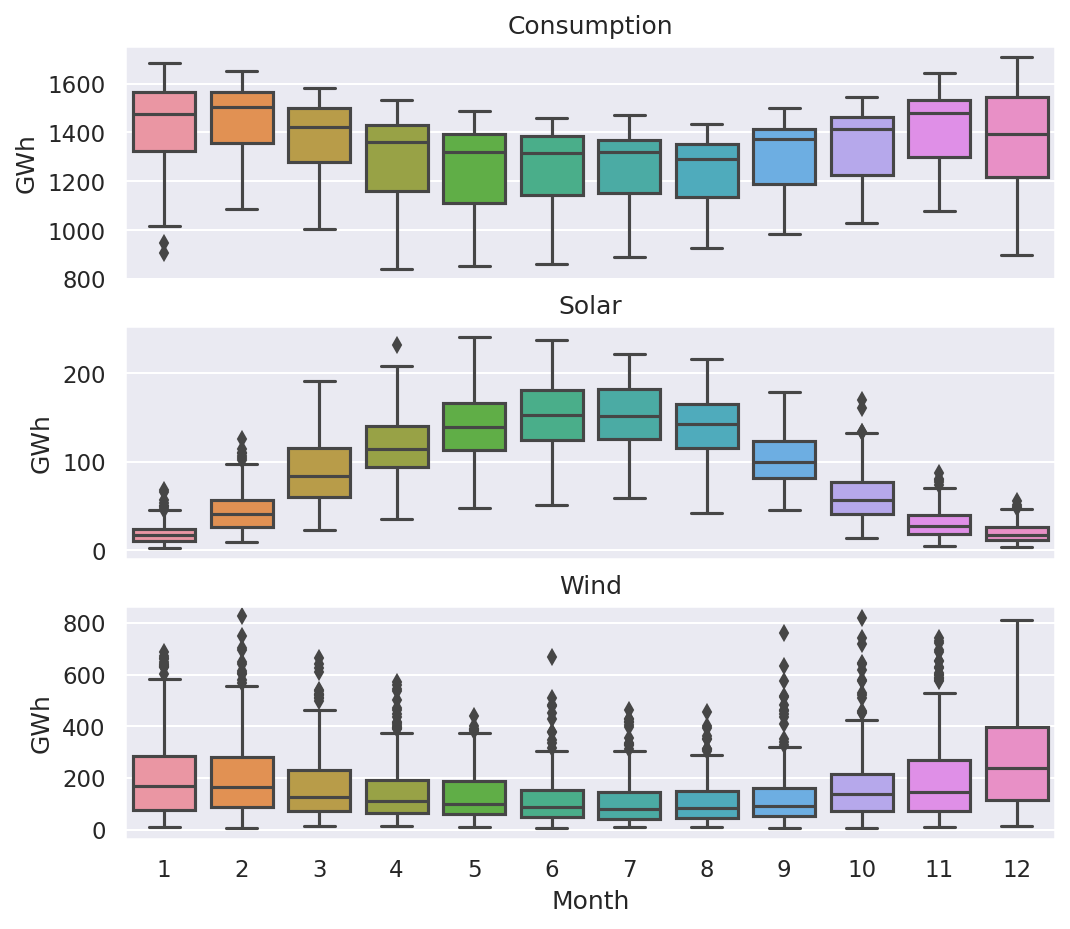

In [52]:
# 1. we can first group the data by months and then use the box plots to visualize the data:
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
  sns.boxplot(data=df_power, x='Month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel('')

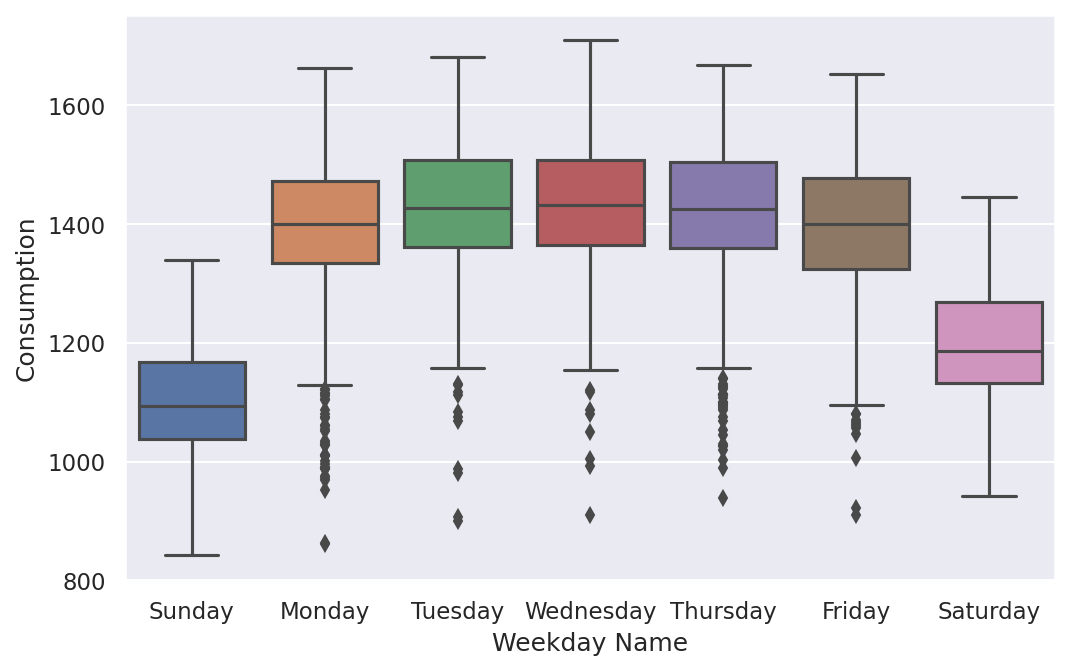

In [55]:
# 2. we can group the consumption of electricity by the day of the week, and present it in a box plot:
sns.boxplot(data=df_power, x='Weekday Name', y='Consumption')

# Resampling time series data

In [56]:
# 1. we can use the code given here to resample our data:
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
power_weekly_mean = df_power[columns].resample('W').mean()
print("power_weekly_mean = ")
print(power_weekly_mean)

power_weekly_mean = 
            Consumption        Wind      Solar  Wind+Solar
Date                                                      
2006-01-01  1069.184000         NaN        NaN         NaN
2006-01-08  1381.300143         NaN        NaN         NaN
2006-01-15  1486.730286         NaN        NaN         NaN
2006-01-22  1490.031143         NaN        NaN         NaN
2006-01-29  1514.176857         NaN        NaN         NaN
...                 ...         ...        ...         ...
2017-12-03  1536.236314  284.334286  18.320857  302.655143
2017-12-10  1554.824946  636.514714  16.440286  652.955000
2017-12-17  1543.856889  442.531857  18.143714  460.675571
2017-12-24  1440.342401  339.018429   9.895143  348.913571
2017-12-31  1203.265211  604.699143  19.240143  623.939286

[627 rows x 4 columns]


In [57]:
# 2. let's see the last six months of 2016. let's sart by initializing the variable:
start, end = '2016-01', '2016-06'

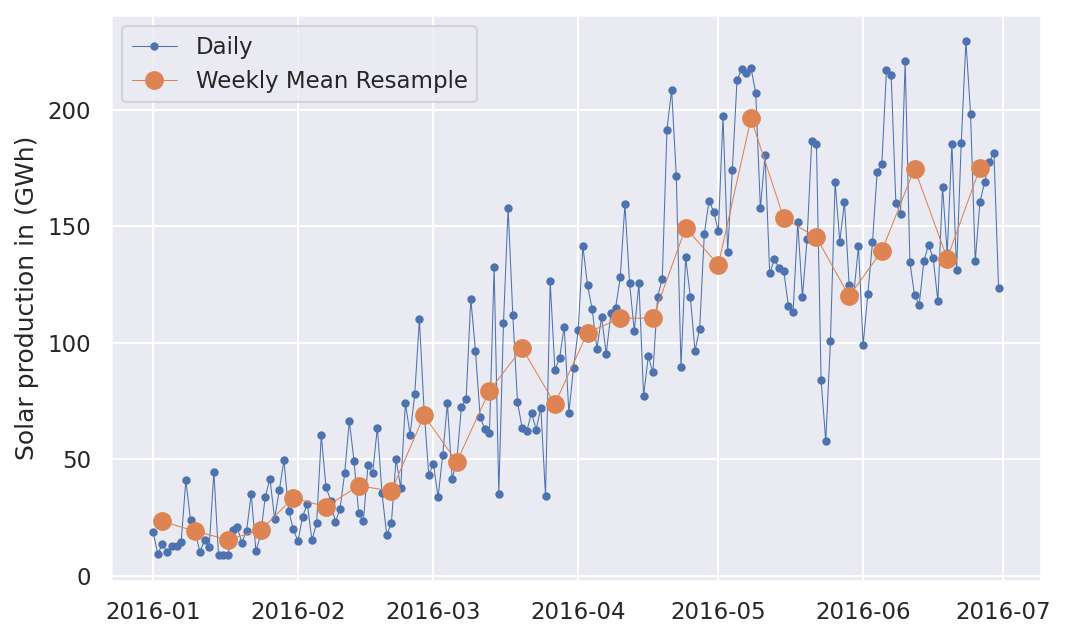

In [62]:
# 3. let's plot the graph using the code given here:
fig, ax = plt.subplots()

ax.plot(df_power.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(power_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', linewidth=0.5, label='Weekly Mean Resample')
ax.set_ylabel('Solar production in (GWh)')
ax.legend()